## **Assignment - 8 (Optional): Document Summarization** 
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

In [1]:
# Import required libraries
import pandas as pd
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Scrape & Load The Article**
#### Source: https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)

In [2]:
data_scraped = url.urlopen('https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)')
article = data_scraped.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [3]:
article_text

'A transformer is a deep learning model that adopts the mechanism of self-attention, differentially weighting the significance of each part of the input data. It is used primarily in the fields of natural language processing (NLP)[1] and computer vision (CV).[2]\nLike recurrent neural networks (RNNs), transformers are designed to handle sequential input data, such as natural language, for tasks such as translation and text summarization. However, unlike RNNs, transformers do not necessarily process the data in order. Rather, the attention mechanism provides context for any position in the input sequence. For example, if the input data is a natural language sentence, the transformer does not need to process the beginning of the sentence before the end. Rather it identifies the context that confers meaning to each word in the sentence. This feature allows for more parallelization than RNNs and therefore reduces training times.[1]\nTransformers were introduced in 2017 by a team at Google 

## **Text Preprocessing**
#### Remove unwanted text & special characters

In [4]:
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

####Sentences tokenization & calculate weighted frequencies



In [5]:
sentence_list = nltk.sent_tokenize(article_text)
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [6]:
word_frequency = pd.DataFrame(word_frequencies.items(), columns=['Keyword', 'Frequency'])
word_frequency

,Keyword,Frequency
0,A,3
1,transformer,16
2,deep,3
3,learning,4
4,model,14
...,...,...
490,library,1
491,produced,1
492,Hugging,1
493,Face,1


In [7]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [8]:
word_weighted = pd.DataFrame(word_frequencies.items(), columns=['Keyword', 'Score'])
word_weighted

,Keyword,Score
0,A,0.068182
1,transformer,0.363636
2,deep,0.068182
3,learning,0.090909
4,model,0.318182
...,...,...
490,library,0.022727
491,produced,0.022727
492,Hugging,0.022727
493,Face,0.022727


## **Text Visualization** 
### Keywords weighted frequency distribution 

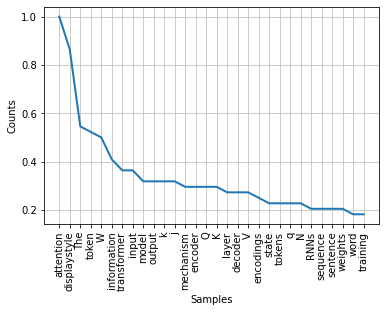

In [9]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

## **Text Manupulation** 
#### Calculate scores of each sentence

In [10]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [11]:
Sentence_weighted = pd.DataFrame(sentence_scores.items(), columns=['Sentence', 'Score'])
Sentence_weighted

,Sentence,Score
0,A transformer is a deep learning model that ad...,1.795455
1,It is used primarily in the fields of natural ...,0.522727
2,"Like recurrent neural networks (RNNs), transfo...",1.500000
3,"However, unlike RNNs, transformers do not nece...",0.500000
4,"Rather, the attention mechanism provides conte...",2.045455
...,...,...
60,Tasks for pretraining and fine-tuning commonly...,1.409091
61,"These may include: In 2020, it was shown that ...",0.704545
62,Transformers have been applied to image proces...,0.590909
63,The transformer model has been implemented in ...,0.909091


## **Text Summarization**
#### Summarize the article

In [12]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [13]:
from textwrap import fill
def formatItem(left, right):
   wrapped = fill(right, width=100, subsequent_indent=' '*15)
   return '  {0:<20}{1}'.format(left, wrapped)

In [14]:
print(formatItem('\033[1m' + 'Summarized Article:' + '\033[0m' , summary))

  Summarized Article:Each decoder layer has an additional attention mechanism that draws information from the outputs of
               previous decoders, before the decoder layer draws information from the encodings.
               Transformers are built on these attention technologies without using an RNN
               structure, highlighting the fact that attention mechanisms alone can match the
               performance of RNNs with attention. While each attention head attends to the tokens
               that are relevant to each token, with multiple attention heads the model can do this
               for different definitions of "relevance". Transformers use an attention mechanism
               without an RNN, processing all tokens at the same time and calculating attention
               weights between them in successive layers. q i ⋅ k j {\displaystyle q_{i}\cdot k_{j}}
               is large), this does not necessarily mean that token j {\displaystyle j} will attend
    